<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction%20(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("data.csv")

In [42]:
df.shape

(536, 8)

In [43]:
df.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.038376
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.031813
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.026353
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.084716
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658


In [44]:
# Drop rows with any missing values
df_dropped = df.dropna()

In [45]:
# remove rows with NaN values
df = df.dropna()

In [46]:
df.shape

(536, 8)

In [47]:
# # remove the dollar sign from all columns
# df = df.replace({'\$': ''}, regex=True)

# # display the modified DataFrame
# print(df)

In [48]:
# # save the DataFrame to a CSV file
# df.to_csv('data3.csv', index=False)

**Remove outliers**

Z-score method: This method is based on the standard deviation of the data. Any data point that is outside a certain number of standard deviations from the mean is considered an outlier. You can use the scipy.stats.zscore function to calculate the z-scores of the data and remove any row with a z-score above a certain threshold.

In [49]:
# from scipy.stats import zscore

# # Calculate z-scores of the dataframe
# z_scores = zscore(df)

# # Identify rows with z-scores above a certain threshold (e.g. 3)
# threshold = 3
# outliers = (abs(z_scores) > threshold).any(axis=1)

# # Remove outliers from the dataframe
# df = df[~outliers]

Interquartile range (IQR) method: This method is based on the distribution of the data. The IQR is the difference between the third quartile and the first quartile of the data. Any data point that is outside a certain range (e.g. 1.5 times the IQR) from the median is considered an outlier. You can use the numpy.percentile function to calculate the quartiles of the data and remove any row with a value outside the IQR range.

In [50]:
# import numpy as np

# # Calculate quartiles of the dataframe
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Identify rows with values outside the IQR range
# threshold = 1.5
# outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# # Remove outliers from the dataframe
# df = df[~outliers]

In [51]:
column_names = df.columns
print(column_names)

Index(['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM', 'ISE'], dtype='object')


In [52]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # create subplots
# fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

# # plot each column on a separate subplot
# for i, col in enumerate(df.columns):
#     axs[i//2, i%2].plot(df[col])
#     axs[i//2, i%2].set_title(col)
#     axs[i//2, i%2].set_xlabel('Time')
#     axs[i//2, i%2].set_ylabel('Values')
#     axs[i//2, i%2].grid(True)  # add grid to subplot

# # adjust subplot spacing
# plt.tight_layout()

# # display plot
# plt.show()

# # save the input and output data
# plt.savefig('In_Out_Data.png')


**Drawing the heatmap**

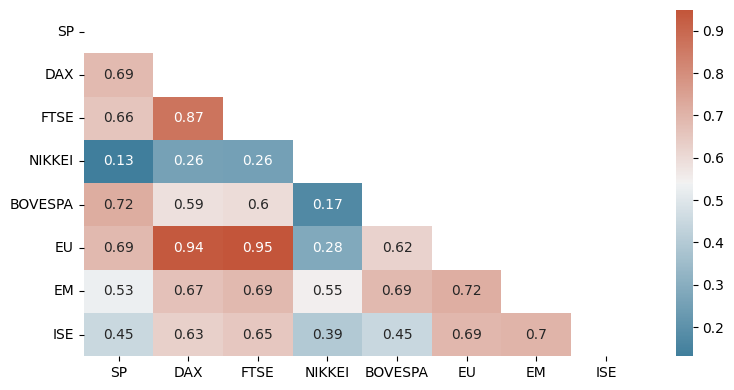

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
# df = pd.read_csv('my_data2.csv')

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 4))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

plt.tight_layout()
plt.savefig('Heatmap.png')


**Correlation between different variables**

In [54]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='ISE', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['ISE'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 ISE        1
EM         2
EU         3
FTSE       4
DAX        5
SP         6
BOVESPA    7
NIKKEI     8
Name: ISE, dtype: int64


In [55]:
# Split data into training and testing sets
X = df.drop('ISE', axis=1).values
y = df['ISE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(428, 7)

In [57]:
X_test.shape

(108, 7)

In [86]:
import matplotlib.pyplot as plt

def plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, filename):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # subplot 1: actual and estimated responses for training cases
    axs[0].plot(y_train, label='Actual train')
    axs[0].plot(y_train_pred, label='Predicted train')
    axs[0].set_title('Training Case')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid()

    # subplot 2: actual and estimated responses for testing cases
    axs[1].plot(y_test, label='Actual test')
    axs[1].plot(y_test_pred, label='Predicted test')
    axs[1].set_title('Testing Case')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()
    axs[1].grid()

    # set supertitle
    fig.suptitle('Actual vs Predicted Responses', fontsize=16)

    # adjust subplot spacing
    plt.tight_layout()

    # Save the figure
    fig.savefig(filename)

    # display plot
    plt.show()


In [59]:
import matplotlib.pyplot as plt
import numpy as np

def plot_two_responses(y_train, y_train_pred, filename, label):
    
    # Assuming y_train and y_train_pred are numpy arrays
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot actual vs predicted response
    ax1.plot(y_train)
    ax1.plot(y_train_pred)
    # ax1.set_xlabel('Training Examples')
    ax1.set_ylabel('Response')
    ax1.set_title(label)
    ax1.legend()
    ax1.grid()

    # Plot error over time
    errors = y_train - y_train_pred.flatten()
    ax2.plot(errors, label='Error')
    # ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('Error')
    # ax2.set_title('Error vs. Training Examples (Training Set)')
    ax2.legend()
    ax2.grid()

    # adjust subplot spacing
    plt.tight_layout()

    plt.show()
    # Save the figure
    fig.savefig(filename)


In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def plot_actual_vs_predicted(name, y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

    ax1.scatter(y_train, y_train_pred, label='Training')
    ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.set_title(f'Training Set (R-Square: {round(r2_score(y_train, y_train_pred), 3)})')
    ax1.grid(True)

    ax2.scatter(y_test, y_test_pred, label='Testing')
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Predicted')
    ax2.set_title(f'Testing Set (R-Square: {round(r2_score(y_test, y_test_pred), 3)})')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the figure with the specified filename
    fig.savefig(f'{name}.png')

In [74]:
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Calculate predictions for both training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the MSE, R-squared, MAE, VAF, and RMSE for both training and testing datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test, y_test_pred)

    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)
    
    # Calculate the VAF for both training and testing datasets
    train_vaf = 1 - (np.var(y_train - y_train_pred) / np.var(y_train))
    test_vaf = 1 - (np.var(y_test - y_test_pred) / np.var(y_test))

    # Store results in a pandas dataframe with a title
    results = pd.DataFrame(data=np.array([[train_mse, train_mae, train_rmse, train_vaf],
                                          [test_mse, test_mae, test_rmse, test_vaf]]),
                          index=['Training Set', 'Testing Set'],
                          columns=['MSE', 'MAE', 'RMSE', 'VAF'])

    # Print results
    print(results)
    
    return results


**Training and Testing data**

In [81]:
# Split data into training and testing sets
X = df.drop('ISE', axis=1).values
y = df['ISE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Selection**

In [63]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectKBest, f_classif

# #======================================
# # Apply feature selection using SelectKBest and F-test
# # We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 
# selector  = SelectKBest(f_classif, k=7)
# #======================================

# X_train    = selector.fit_transform(X_Train, y_train)
# X_test     = selector.transform(X_Test)

# y_train = y_train
# y_test  = y_test

**Linear Regression**

In [82]:
from sklearn.linear_model import LinearRegression
# Train the linear regression model
LinearR = LinearRegression()
LinearR.fit(X_train, y_train)

# Predict output for training and testing sets
y_train_pred = LinearR.predict(X_train)
y_test_pred = LinearR.predict(X_test)

In [83]:
evaluate_model(LinearR, X_train, y_train, X_test, y_test)

                   MSE       MAE      RMSE       VAF
Training Set  0.000171  0.010084  0.013096  0.578219
Testing Set   0.000243  0.011722  0.015586  0.585844


,MSE,MAE,RMSE,VAF
Training Set,0.000171,0.010084,0.013096,0.578219
Testing Set,0.000243,0.011722,0.015586,0.585844


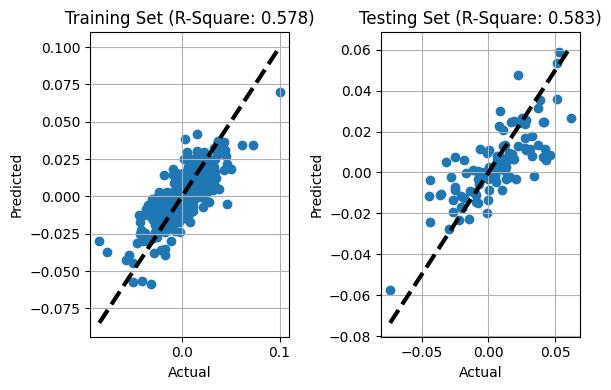

In [84]:
plot_actual_vs_predicted('Correlation_LR', y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
# plot_two_responses(y_train, y_train_pred, 'LR_training', 'Training case')
# plot_two_responses(y_train, y_train_pred, 'LR_testing', 'Testing case')

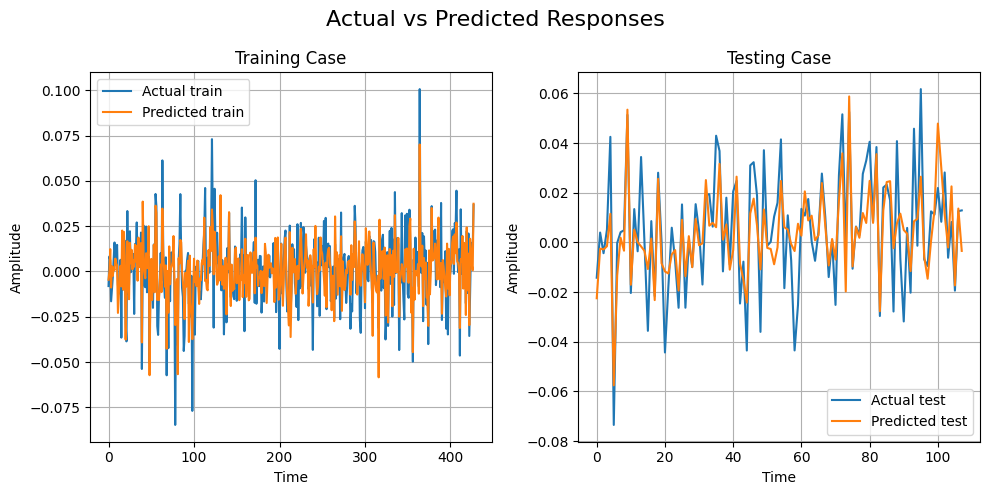

In [87]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, 'Actual_Estimated_SS_LR.png')

**Deep Learning**

4/4 [==============================] - 0s 4ms/step
------------------------------------
Model 1 (1 layers):
MSE: 0.0002
MAE: 0.0114
RMSE: 0.0154
------------------------------------
Model 2 (2 layers):
MSE: 0.0003
MAE: 0.0120
RMSE: 0.0160
------------------------------------
Model 3 (3 layers):
MSE: 0.0003
MAE: 0.0129
RMSE: 0.0169
------------------------------------
Model 4 (4 layers):
MSE: 0.0003
MAE: 0.0124
RMSE: 0.0165


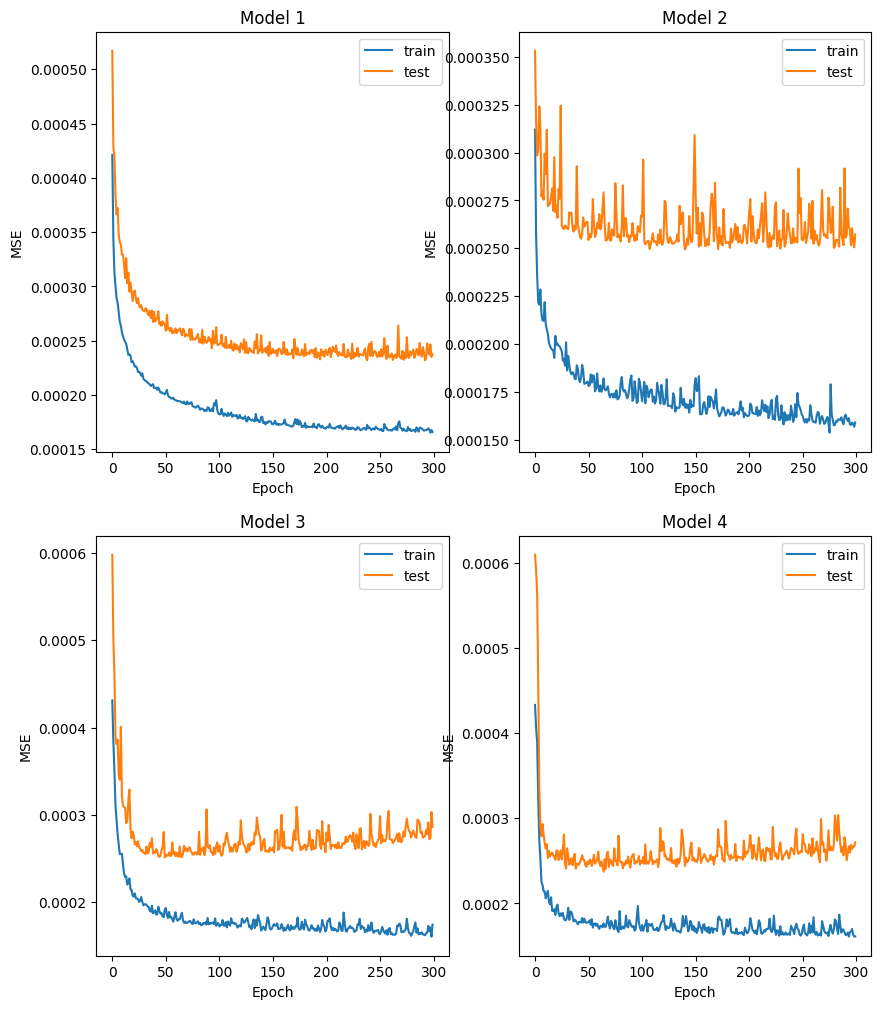

In [101]:
# Define layer sizes
layer_sizes = [[7], [8, 8], [9, 9, 9], [10,10,10,10]]

# Define lists to store metrics and histories for each model
mse_list = []
mae_list = []
rmse_list = []
history_list = []

# Train each model and store metrics and histories
for i, layers in enumerate(layer_sizes):
    model = Sequential()
    for j, layer_size in enumerate(layers):
        if j == 0:
            model.add(Dense(layer_size, input_dim=X_train.shape[1], activation='relu'))
        else:
            model.add(Dense(layer_size, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    history_list.append(history)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    
    # Save the model with a name
    model_name = f'model_{i+1}_{len(layers)}layers.h5'
    model.save(f'model_{i+1}.h5')

# Plot convergence curves in a subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = axs.ravel()
for i, history in enumerate(history_list):
    axs[i].plot(history.history['loss'], label='train')
    axs[i].plot(history.history['val_loss'], label='test')
    axs[i].set_title(f'Model {i+1}')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MSE')
    axs[i].legend()

# Print metrics for each model
for i, layers in enumerate(layer_sizes):
    print('------------------------------------')
    print(f'Model {i+1} ({len(layers)} layers):')
    print(f'MSE: {mse_list[i]:.4f}')
    print(f'MAE: {mae_list[i]:.4f}')
    print(f'RMSE: {rmse_list[i]:.4f}')


In [89]:
# Print the model summary
print(f"Model {i+1} ({len(layers)} layers):")
model.summary()

Model 4 (4 layers):
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                80        
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [102]:
from keras.models import load_model

model = load_model('model_4.h5')

# Predict at training and testing cases
y_train_pred2 = model.predict(X_train)
y_test_pred2 = model.predict(X_test)

4/4 [==============================] - 0s 9ms/step


In [103]:
evaluate_model(model, X_train, y_train, X_test, y_test)

4/4 [==============================] - 0s 3ms/step
                   MSE       MAE      RMSE       VAF
Training Set  0.000159  0.009821  0.012597 -0.625039
Testing Set   0.000272  0.012405  0.016483 -0.576094


,MSE,MAE,RMSE,VAF
Training Set,0.000159,0.009821,0.012597,-0.625039
Testing Set,0.000272,0.012405,0.016483,-0.576094


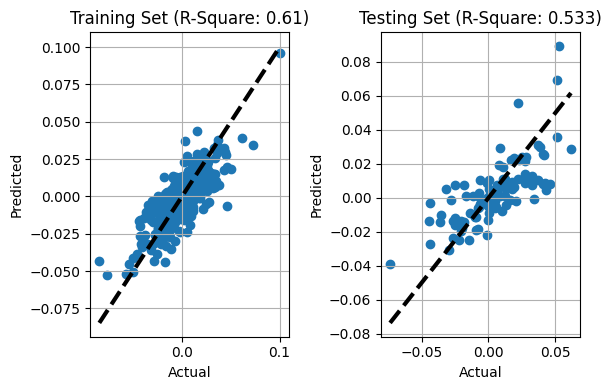

In [104]:
plot_actual_vs_predicted('Correlation_DL', y_train, y_train_pred2, y_test, y_test_pred2)

In [ ]:
# plot_two_responses(y_train, y_train_pred2, 'DL_training.png', 'Training case')
# plot_two_responses(y_train, y_train_pred2, 'DL_testing.png', 'Testing case')

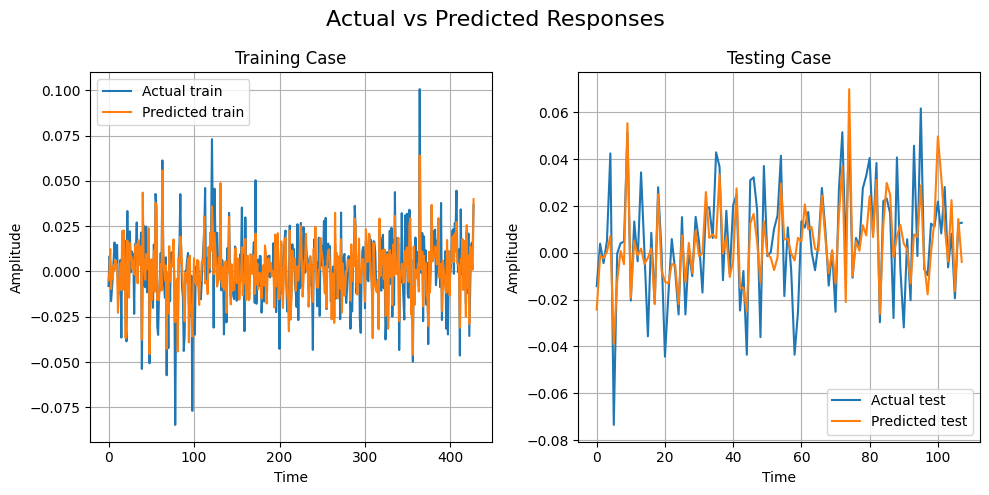

In [97]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred2, y_test, y_test_pred2, 'Actual_Estimated_SS_DL.png')

In [93]:
# Save the model
model.save('CNN_model_Turkey_2.h5')

In [94]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')